In [ ]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install requests

In [240]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install stop-words

In [16]:
import requests
import json
import re
import string
import collections
import matplotlib.pyplot as plt

In [17]:
def get_content(subject):
    S = requests.Session()
    URL = "https://en.wikipedia.org/w/api.php"
    PARAMS = {
        "action": "query",
        "prop": "revisions",
        "titles": subject,
        "rvprop": "content",
         "rvslots": "main",
        "rvsection": 0,
        "formatversion": "2",
        "format": "json"
    }

    R = S.get(url=URL, params=PARAMS)
#     print(type(DATA))
#     print(type(R))
    DATA = R.json()
#     print(DATA)
    return DATA

In [18]:
DATA = get_content("Ozone_layer")

In [19]:
def merge_content(DATA):
    #GETTING THE NEEDED CONTENT FROM DICTIONARY
    query = DATA['query']
    pages = query['pages']
    pages = pages[0]
    title = pages['title']
    revisions = pages['revisions']
    revisions = revisions[0]
    slots = revisions['slots']
    main = slots['main']
    content = main['content']
    
    content_list = content.splitlines()
    content_list = content_list[4:12:2]
    #INDEXES WERE FOUND BY ENUMERATE
#     print(len(content_list))
#     content_list_enum = list(enumerate(content_list))
#     for line in content_list_enum:
#         print(line)

    #JOIN THE LIST
    separator = ','
    DATA_string = separator.join(content_list)
    
    #CLEAN the <ref>
    DATA_string = DATA_string.lower()
    DATA_string = re.sub('<[^>]+>', '', DATA_string)
    DATA_string = re.sub('{{cite[^}}]+}}', '', DATA_string)
    DATA_string = re.sub('\[http[^\]]+]', '', DATA_string)
    DATA_string = re.sub('\[\[|\]\]', '', DATA_string)
    DATA_string = re.sub('\'\'\'', '', DATA_string)
    DATA_string = re.sub('\|', ' ', DATA_string)
    DATA_string = re.sub('&nbsp;', ' ', DATA_string)
    DATA_string = re.sub('–', ' ', DATA_string)
    DATA_string = re.sub('\{\{', '', DATA_string)
    DATA_string = re.sub('\}\}', '', DATA_string)
    
    print(DATA_string)
#     print(type(DATA_string))
    return DATA_string

In [20]:
DATA = merge_content(DATA)


the ozone layer or ozone shield is a region of earth's stratosphere that absorbs most of the sun's ultraviolet  radiation. it contains a high concentration of ozone (o3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. the ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in earth's atmosphere as a whole is about 0.3 parts per million. the ozone layer is mainly found in the lower portion of the stratosphere, from approximately convert 15 to 35 km sp=us above earth, although its thickness varies seasonally and geographically.,the ozone layer was discovered in 1913 by the french physicists charles fabry and henri buisson. measurements of the sun showed that the radiation sent out from its surface and reaching the ground on earth is usually consistent with the spectrum of a black body with a temperature in the range of 5,500 6,000 k (5,227 to 5,727 °c), except that there was

In [305]:
# Anuar's Method
# def tokenize(content):
#     splitter = [" ", "\n", ".", "'", "(", ")"]
#     result_list = []
#     current_word = ""
#     for x in content:
#         if x in splitter:
#             if current_word != "" and current_word != "s":
#                 result_list.append(current_word)
#             current_word = ""
#         else:
#             current_word += x
    
#     return result_list

In [306]:
def tokenize(content):
    for line in content.splitlines():
        line = line.translate(line.maketrans('', '',string.punctuation))
        words = line.split()
        print (words)
        return words
        
        

In [307]:
collection = tokenize(DATA)

['the', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', 'earths', 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', 'suns', 'ultraviolet', 'radiation', 'it', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'o3', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'the', 'ozone', 'layer', 'contains', 'less', 'than', '10', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', 'earths', 'atmosphere', 'as', 'a', 'whole', 'is', 'about', '03', 'parts', 'per', 'million', 'the', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', 'convert', '15', 'to', '35', 'km', 'spus', 'above', 'earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographicallythe', 'ozone', 'layer', 'was', 'discovered', 'in', '1

In [308]:
def lower_collection(collection):
    collection = [word.replace(word, word.lower()) for word in collection]
    print(collection)
    return collection

In [309]:
collection = lower_collection(collection)

['the', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', 'earths', 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', 'suns', 'ultraviolet', 'radiation', 'it', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'o3', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'the', 'ozone', 'layer', 'contains', 'less', 'than', '10', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', 'earths', 'atmosphere', 'as', 'a', 'whole', 'is', 'about', '03', 'parts', 'per', 'million', 'the', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', 'convert', '15', 'to', '35', 'km', 'spus', 'above', 'earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographicallythe', 'ozone', 'layer', 'was', 'discovered', 'in', '1

In [310]:
def remove_stop_words(word_list):
    from stop_words import get_stop_words
    stop_words = get_stop_words('en')
#     print(stop_words)

    new_word_list = [word for word in word_list if word not in stop_words]
#     print(new_word_list)
    return new_word_list
            

In [312]:
collection = remove_stop_words(collection)

['ozone', 'layer', 'ozone', 'shield', 'region', 'earths', 'stratosphere', 'absorbs', 'suns', 'ultraviolet', 'radiation', 'contains', 'high', 'concentration', 'ozone', 'o3', 'relation', 'parts', 'atmosphere', 'although', 'still', 'small', 'relation', 'gases', 'stratosphere', 'ozone', 'layer', 'contains', 'less', '10', 'parts', 'per', 'million', 'ozone', 'average', 'ozone', 'concentration', 'earths', 'atmosphere', 'whole', '03', 'parts', 'per', 'million', 'ozone', 'layer', 'mainly', 'found', 'lower', 'portion', 'stratosphere', 'approximately', 'convert', '15', '35', 'km', 'spus', 'earth', 'although', 'thickness', 'varies', 'seasonally', 'geographicallythe', 'ozone', 'layer', 'discovered', '1913', 'french', 'physicists', 'charles', 'fabry', 'henri', 'buisson', 'measurements', 'sun', 'showed', 'radiation', 'sent', 'surface', 'reaching', 'ground', 'earth', 'usually', 'consistent', 'spectrum', 'black', 'body', 'temperature', 'range', '5500', '6000', 'k', '5227', '5727', '°c', 'except', 'radi

In [313]:
def count_frequency(collection):
    freq_table = {}
    for word in collection:
        freq_table[word] = freq_table.get(word,0) + 1
    return freq_table

In [314]:
frequencies = count_frequency(collection)

In [315]:
def print_most_frequent(frequencies, n):
    word_counter = collections.Counter(frequencies)
    for word,count in word_counter.most_common(n):
        print(word,':',count)

In [316]:
print_most_frequent(frequencies,20)

ozone : 17
layer : 7
radiation : 6
dobson : 4
stratosphere : 3
ultraviolet : 3
parts : 3
atmosphere : 3
earth : 3
spectrum : 3
nm : 3
earths : 2
absorbs : 2
suns : 2
contains : 2
concentration : 2
relation : 2
although : 2
per : 2
million : 2


In [317]:
def visualize(frequencies,n):
    freq_list = collections.Counter(frequencies)
    top_list = freq_list.most_common(n)
    top_dict = dict(top_list)
    keys = list(top_dict.keys())
    values = list(top_dict.values())
    keys.reverse()
    values.reverse()
    
    plt.barh(keys,values)
    plt.title("Most Common Tokens in the Ozone layer article")
    plt.show

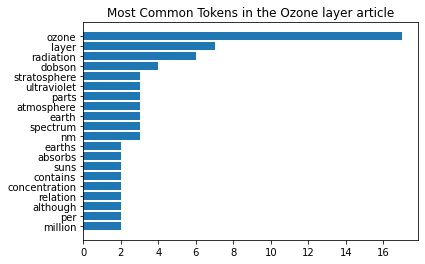

In [318]:
visualize(frequencies,20)